In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

Задача №1

Выпишем Лагранжиан

$$L(x, \lambda, \mu) = c^Tx - \lambda^Tx + \mu^T(Ax - b)$$

Двойственная функция: $q(\lambda, \mu) = \inf\limits_{x\in D} L(x, \lambda, \mu)$.

Давайте заметим, что мы получили линейную функцию от $x$, тогда инфимум всегда будет минус бесконечность при ненулевом коэффициенте при $x$. То есть нам интересен случай $c^T - \lambda^T + \mu^T A = 0$, при котором $q = -\mu^T b$.

Таким образом двойственная задача:

максимизировать $-\mu^T b$, при условии $\lambda \geq 0$ и $c^T - \lambda^T + \mu^T A = 0$

In [2]:
def findSolutionDual(A, b, c):
    l = cp.Variable(c.shape)
    m = cp.Variable(b.shape)
    objective = cp.Maximize(-m.T @ b)
    constraints = [l >= 0, c.T - l.T + m.T @ A == 0]
    prob = cp.Problem(objective, constraints)
    prob.solve()
    return l.value, m.value

In [3]:
def task1(A, b, c, eps = 1e-6):
    l, _ = findSolutionDual(A, b, c)
    # если lambda_i != 0, то x_i = 0
    x = np.zeros(A.shape[1])
    zero_indexes = (l < eps) & (l > -eps)
    x[zero_indexes] = np.linalg.inv(A[:, zero_indexes].T @ A[:, zero_indexes]) @ A[:, zero_indexes].T @ b
    return x

In [4]:
eps = 1e-3

A = np.array([[1, 2, 1, 0], [2, 1, 0, 1]])
b = np.array([8, 10])
c = np.array([3, 4, 0, 0])
x = cp.Variable(c.shape[0])
objective = cp.Minimize(c.T @ x)
constraints = [x >= 0, A @ x == b]
prob = cp.Problem(objective, constraints)
prob.solve()
x_ans = x.value
x_task1 = task1(A, b, c, eps*eps)
assert x_ans.shape[0] == x_task1.shape[0]
x_size = x_ans.shape[0]
for i in range(x_size):
    assert abs(x_ans[i] - x_task1[i]) < eps
print("OK")

OK


Задача №2

In [5]:
def task2(points):
    x = cp.Variable((points.shape[1], 1))
    objective = cp.Minimize(cp.max(cp.sum((points.T - x)**2, axis=0)))
    prob = cp.Problem(objective)
    prob.solve()
    return x.value.reshape(-1), np.sqrt(prob.value)

In [6]:
eps = 1e-3

test1 = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [2, 2]])
test2 = np.array([[0, 0], [1, 1], [0, 2], [-1, 1]])
ac1, ar1 = (np.array([1, 1]), np.sqrt(2))
ac2, ar2 = (np.array([0, 1]), 1)
c1, r1 = task2(test1)
c2, r2 = task2(test2)
assert ac1.shape[0] == c1.shape[0]
c1_size = c1.shape[0]
for i in range(c1_size):
    assert abs(ac1[i] - c1[i]) < eps
assert abs(ar1 - r1) < eps
assert ac2.shape[0] == c2.shape[0]
c2_size = c2.shape[0]
for i in range(c2_size):
    assert abs(ac2[i] - c2[i]) < eps
assert abs(ar2 - r2) < eps
print("OK")

OK


Задача №3

In [7]:
def task3(x, y):
    a = cp.Variable(x.shape[1])
    objective = cp.Maximize(cp.min(a.T @ x[y == 0].T) - cp.max(a.T @ x[y == 1].T))
    constraints = [cp.norm(a) <= 1]
    prob = cp.Problem(objective, constraints)
    prob.solve()
    return a.value

[-0.88657767  0.46257975]


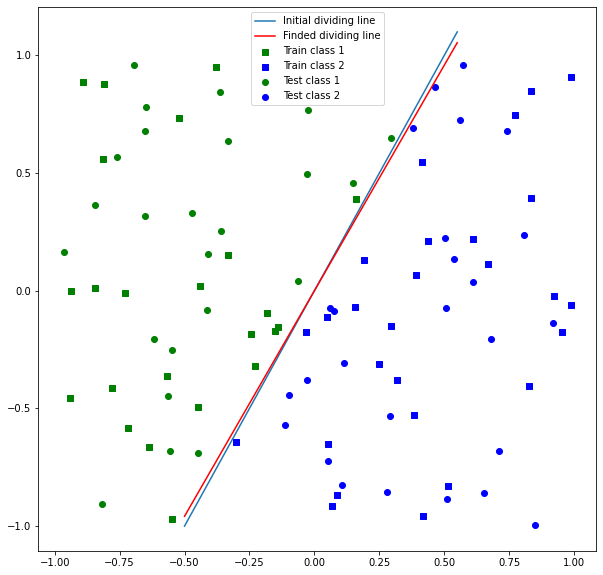

In [8]:
xs_train = np.random.uniform(-1, 1, 100).reshape(50, 2)
ys_train = np.zeros(xs_train.shape[0])
for i in range(ys_train.shape[0]):
    if 2*xs_train[i, 0] - xs_train[i, 1] >= 0:
        ys_train[i] = 1
        
a = task3(xs_train, ys_train)

xs_test = np.random.uniform(-1, 1, 100).reshape(50, 2)
ys_test = np.zeros(xs_test.shape[0])
err = 0
for i in range(xs_test.shape[0]):
    if 2*xs_test[i, 0] - xs_test[i, 1] >= 0:
        ys_test[i] = 1
    predclass = 0
    if a @ xs_test[i] < 0:
        predclass = 1
    if predclass != ys_test[i]:
        err += 1
        
print(a)
plt.figure(figsize = (10, 10))
plt.scatter(xs_train[ys_train == 0, 0], xs_train[ys_train == 0, 1], color = 'g', marker = 's', label='Train class 1')
plt.scatter(xs_train[ys_train == 1, 0], xs_train[ys_train == 1, 1], color = 'b', marker = 's', label='Train class 2')
ls = np.linspace(-0.5, 0.55, 1000)
plt.plot(ls, 2*ls, label = 'Initial dividing line')
plt.scatter(xs_test[ys_test == 0, 0], xs_test[ys_test == 0, 1], color = 'g', marker = 'o', label='Test class 1')
plt.scatter(xs_test[ys_test == 1, 0], xs_test[ys_test == 1, 1], color = 'b', marker = 'o', label='Test class 2')
plt.plot(ls, ls * (-a[0]) / a[1], color='r', label = 'Finded dividing line')
plt.legend()
plt.show()